In [1]:
% matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import maxnorm
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as rfc

np.random.seed(1)

Using TensorFlow backend.


In [2]:
X = pd.read_csv("Brazil_Bahia.csv", header=None)
Y_bin = pd.read_csv("y.csv", header=None)
Y_bin_np = np.array(Y_bin)
brazil_X = pd.read_csv("Brazil_all.csv",header=None)
maranhao_X = pd.read_csv("Brazil_Maranhao.csv",header=None)
norte_X = pd.read_csv("Brazil_Norte.csv",header=None)
per_X = pd.read_csv("Brazil_Per.csv",header=None)
spanish_brazil = pd.read_csv("Spanish_Brazil.csv",header=None)
spanish_bahia = pd.read_csv("Spanish_Bahia.csv",header=None)
spanish_maran = pd.read_csv("Spanish_Maran.csv",header=None)
spanish_norte = pd.read_csv("Spanish_Norte.csv",header=None)
spanish_per = pd.read_csv("Spanish_Per.csv",header=None)

In [3]:
dates = X.pop(0)

In [4]:
X_np = np.array((X+0.1)/(0.1+100))
Y_bin_np = np.array(Y_bin)

In [5]:
sin_X = pd.DataFrame(np.sin(X_np))
cos_X = pd.DataFrame(np.cos(X_np))
square_X = pd.DataFrame((X_np)**2)
root_X = pd.DataFrame((X_np)**(1/2))
X_all_concat = pd.concat([pd.DataFrame(X_np),sin_X,cos_X,square_X,root_X],2)
X_np_new = np.array(X_all_concat)
X_np_diff = np.diff(X_np_new, axis = 0)

In [6]:
dates = brazil_X.pop(0)
brazil_X_np = np.array((brazil_X+0.1)/(0.1+100))

In [7]:
sin_X_br = pd.DataFrame(np.sin(brazil_X_np))
cos_X_br = pd.DataFrame(np.cos(brazil_X_np))
square_X_br = pd.DataFrame((brazil_X_np)**2)
root_X_br = pd.DataFrame((brazil_X_np)**(1/2))
brazil_all_concat = pd.concat([pd.DataFrame(brazil_X_np),sin_X_br,cos_X_br,square_X_br,root_X_br],2)
brazil_np_new = np.array(brazil_all_concat)
brazil_np_diff = np.diff(brazil_np_new, axis = 0)

In [8]:
maranhao_X_np = np.array((maranhao_X+0.1)/(0.1+100))
sin_X_mh = pd.DataFrame(np.sin(maranhao_X_np))
cos_X_mh = pd.DataFrame(np.cos(maranhao_X_np))
square_X_mh = pd.DataFrame((maranhao_X_np)**2)
root_X_mh = pd.DataFrame((maranhao_X_np)**(1/2))
maranhao_all_concat = pd.concat([pd.DataFrame(maranhao_X_np),sin_X_mh,
                               cos_X_mh,square_X_mh,root_X_mh],2)
maranhao_np_new = np.array(maranhao_all_concat)
maranhao_np_diff = np.diff(maranhao_np_new, axis = 0)

In [9]:
norte_X_np = np.array((norte_X+0.1)/(0.1+100))
sin_X_nt = pd.DataFrame(np.sin(norte_X_np))
cos_X_nt = pd.DataFrame(np.cos(norte_X_np))
square_X_nt = pd.DataFrame((norte_X_np)**2)
root_X_nt = pd.DataFrame((norte_X_np)**(1/2))
norte_all_concat = pd.concat([pd.DataFrame(norte_X_np),sin_X_nt,
                               cos_X_nt,square_X_nt,root_X_nt],2)
norte_np_new = np.array(norte_all_concat)
norte_np_diff = np.diff(norte_np_new, axis = 0)

In [10]:
per_X_np = np.array((per_X+0.1)/(0.1+100))
sin_X_pe = pd.DataFrame(np.sin(per_X_np))
cos_X_pe = pd.DataFrame(np.cos(per_X_np))
square_X_pe = pd.DataFrame((per_X_np)**2)
root_X_pe = pd.DataFrame((per_X_np)**(1/2))
per_all_concat = pd.concat([pd.DataFrame(per_X_np),sin_X_pe,
                               cos_X_pe,square_X_pe,root_X_pe],2)
per_np_new = np.array(per_all_concat)
per_np_diff = np.diff(per_np_new, axis = 0)

In [11]:
spanish_brazil = np.array((spanish_brazil+0.1)/(0.1+100))
sin_X_br = pd.DataFrame(np.sin(spanish_brazil))
cos_X_br = pd.DataFrame(np.cos(spanish_brazil))
square_X_br = pd.DataFrame((spanish_brazil)**2)
root_X_br = pd.DataFrame((spanish_brazil)**(1/2))
brazil_all_concat1 = pd.concat([pd.DataFrame(spanish_brazil),sin_X_br,cos_X_br,square_X_br,root_X_br],2)
spanish_brazil_np = np.array(brazil_all_concat1)
spanish_brazil_np_diff = np.diff(spanish_brazil_np, axis = 0)

In [12]:
spanish_bahia = np.array((spanish_bahia+0.1)/(0.1+100))
sin_X_br = pd.DataFrame(np.sin(spanish_bahia))
cos_X_br = pd.DataFrame(np.cos(spanish_bahia))
square_X_br = pd.DataFrame((spanish_bahia)**2)
root_X_br = pd.DataFrame((spanish_bahia)**(1/2))
brazil_all_concat2 = pd.concat([pd.DataFrame(spanish_bahia),sin_X_br,cos_X_br,square_X_br,root_X_br],2)
spanish_bahia_np = np.array(brazil_all_concat2)
spanish_bahia_np_diff = np.diff(spanish_bahia_np, axis = 0)

In [13]:
spanish_maran = np.array((spanish_maran+0.1)/(0.1+100))
sin_X_br = pd.DataFrame(np.sin(spanish_maran))
cos_X_br = pd.DataFrame(np.cos(spanish_maran))
square_X_br = pd.DataFrame((spanish_maran)**2)
root_X_br = pd.DataFrame((spanish_maran)**(1/2))
brazil_all_concat3 = pd.concat([pd.DataFrame(spanish_maran),sin_X_br,cos_X_br,square_X_br,root_X_br],2)
spanish_maran_np = np.array(brazil_all_concat3)
spanish_maran_np_diff = np.diff(spanish_maran_np, axis = 0)

In [14]:
spanish_norte = np.array((spanish_norte+0.1)/(0.1+100))
sin_X_br = pd.DataFrame(np.sin(spanish_norte))
cos_X_br = pd.DataFrame(np.cos(spanish_norte))
square_X_br = pd.DataFrame((spanish_norte)**2)
root_X_br = pd.DataFrame((spanish_norte)**(1/2))
brazil_all_concat4 = pd.concat([pd.DataFrame(spanish_norte),sin_X_br,cos_X_br,square_X_br,root_X_br],2)
spanish_norte_np = np.array(brazil_all_concat4)
spanish_norte_np_diff = np.diff(spanish_norte_np, axis = 0)

In [15]:
spanish_per = np.array((spanish_per+0.1)/(0.1+100))
sin_X_br = pd.DataFrame(np.sin(spanish_per))
cos_X_br = pd.DataFrame(np.cos(spanish_per))
square_X_br = pd.DataFrame((spanish_per)**2)
root_X_br = pd.DataFrame((spanish_per)**(1/2))
brazil_all_concat5 = pd.concat([pd.DataFrame(spanish_per),sin_X_br,cos_X_br,square_X_br,root_X_br],2)
spanish_per_np = np.array(brazil_all_concat5)
spanish_per_np_diff = np.diff(spanish_per_np, axis = 0)

In [ ]:
model_brazil = Sequential()

model_brazil.add(Dense(brazil_np_new.shape[1]*2, input_dim = brazil_np_new.shape[1],
                          init='normal', activation='elu', bias = 0.5 
                           ,W_constraint = maxnorm(5)))
model_brazil.add(Dropout(0.2))

model_brazil.add(Dense(brazil_np_new.shape[1]*1.5, init='normal', activation='elu'
                      , bias = 1 ))
model_brazil.add(Dropout(0.2))

model_brazil.add(Dense(brazil_np_new.shape[1], init='normal', activation='elu'
                      , bias = 0.1))
model_brazil.add(Dropout(0.2))

model_brazil.add(Dense(brazil_np_new.shape[1]*0.5, init='normal', activation='elu'
                      , bias = 0.1))
model_brazil.add(Dropout(0.2))

model_brazil.add(Dense(1, init='normal', activation='sigmoid'
                      , bias = 0.1))
model_brazil.add(Dropout(0.2))

model_brazil.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])
history_brazil = model_brazil.fit(brazil_np_new, Y_bin_np, nb_epoch=200, batch_size=10)

Epoch 1/200
268/268 [==============================] - 1s - loss: 1.9743 - mean_squared_error: 0.2793      

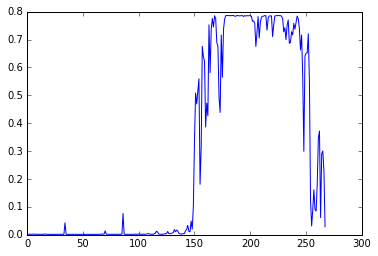

In [59]:
plt.plot(model_brazil.predict(brazil_np_new))
model_brazil.save('model_portugese.h5')

Epoch 1/100
268/268 [==============================] - 3s - loss: 1.8877 - mean_squared_error: 0.2869      
Epoch 2/100
268/268 [==============================] - 0s - loss: 1.3992 - mean_squared_error: 0.2507     

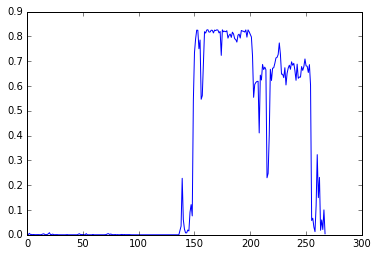

In [117]:
model_spanish = Sequential()

model_spanish.add(Dense(brazil_np_new.shape[1], input_dim = brazil_np_new.shape[1],
                          init='normal', activation='elu', bias = 0.3))
model_spanish.add(Dropout(0.2))

model_spanish.add(Dense(brazil_np_new.shape[1]*1.5, init='normal', activation='elu'
                      , bias = 0.1))
model_spanish.add(Dropout(0.2))

model_spanish.add(Dense(brazil_np_new.shape[1], init='normal', activation='elu'
                      , bias = 0.1))
model_spanish.add(Dropout(0.2))

model_spanish.add(Dense(brazil_np_new.shape[1]*0.5, init='normal', activation='elu'
                      , bias = 0.1))
model_spanish.add(Dropout(0.2))


model_spanish.add(Dense(1, init='normal', activation='sigmoid'
                      , bias = 0.1))
model_spanish.add(Dropout(0.2))


model_spanish.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])
history_spanish = model_spanish.fit(spanish_brazil_np, Y_bin_np, nb_epoch=100, batch_size=10)

plt.plot(model_spanish.predict(spanish_brazil_np))

In [118]:
model_spanish.save('model_spanish.h5')

In [17]:
model_portugese = load_model('model_portugese.h5')
model_spanish = load_model('model_spanish.h5')

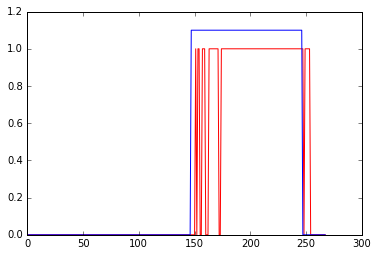

In [18]:
plot1 = plt.plot((model_portugese.predict(brazil_np_new)>0.5), color = 'red')
plot2 = plt.plot(Y_bin_np*1.1)
plt.plot(1.1)

0.9328


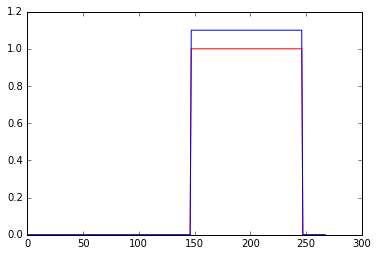

In [19]:
model_portugese_1 = rfc(n_estimators=100,min_samples_split=1, min_samples_leaf=1, 
                    max_features='auto', max_leaf_nodes=None, 
                    oob_score=True, n_jobs=-1, random_state=1)
model_portugese_1.fit(maranhao_X_np,np.array(pd.DataFrame(Y_bin_np)[0]))
print("%.4f" % model_portugese_1.oob_score_)
plt.plot(model_portugese_1.predict(maranhao_X_np),color='red')
plt.plot(Y_bin_np*1.1,color='blue')

0.9216


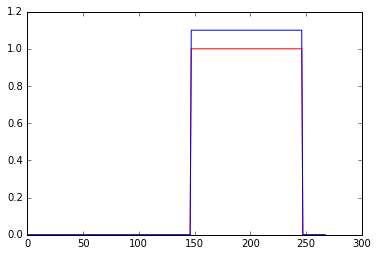

In [20]:
model_portugese_2 = rfc(n_estimators=100,min_samples_split=1, min_samples_leaf=1, 
                    max_features='auto', max_leaf_nodes=None, 
                    oob_score=True, n_jobs=-1, random_state=1)
model_portugese_2.fit(norte_X_np,np.array(pd.DataFrame(Y_bin_np)[0]))
print("%.4f" % model_portugese_2.oob_score_)
plt.plot(model_portugese_2.predict(norte_X_np),color='red')
plt.plot(Y_bin_np*1.1,color='blue')

0.9403


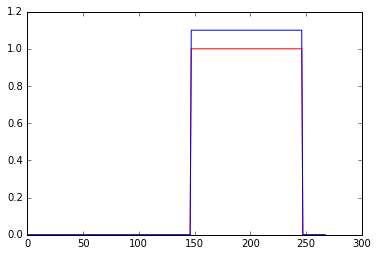

In [21]:
model_portugese_3 = rfc(n_estimators=100,min_samples_split=1, min_samples_leaf=1, 
                    max_features='auto', max_leaf_nodes=None, 
                    oob_score=True, n_jobs=-1, random_state=1)
model_portugese_3.fit(per_X_np,np.array(pd.DataFrame(Y_bin_np)[0]))
print("%.4f" % model_portugese_3.oob_score_)
plt.plot(model_portugese_3.predict(per_X_np),color='red')
plt.plot(Y_bin_np*1.1,color='blue')

0.8022


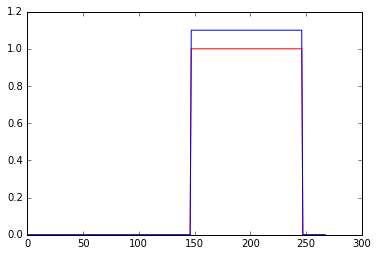

In [22]:
model_spanish_1 = rfc(n_estimators=200,min_samples_split=1, min_samples_leaf=1,
                    max_features='auto', max_leaf_nodes=None, 
                    oob_score=True, n_jobs=-1, random_state=1)
model_spanish_1.fit(spanish_maran,np.array(pd.DataFrame(Y_bin_np)[0]))
print("%.4f" % model_spanish_1.oob_score_)
plt.plot(model_spanish_1.predict(spanish_maran),color='red')
plt.plot(Y_bin_np*1.1,color='blue')

0.8246


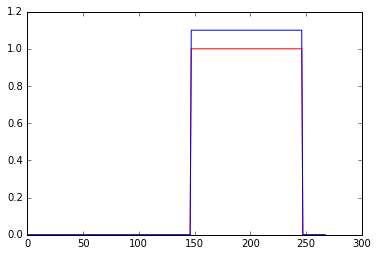

In [23]:
model_spanish_2 = rfc(n_estimators=200,min_samples_split=1, min_samples_leaf=1, 
                    max_features='auto', max_leaf_nodes=None, 
                    oob_score=True, n_jobs=-1, random_state=1)
model_spanish_2.fit(spanish_norte,np.array(pd.DataFrame(Y_bin_np)[0]))
print("%.4f" % model_spanish_2.oob_score_)
plt.plot(model_spanish_2.predict(spanish_norte),color='red')
plt.plot(Y_bin_np*1.1,color='blue')

0.8209


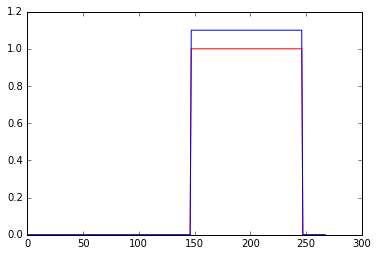

In [24]:
model_spanish_3 = rfc(n_estimators=200,min_samples_split=1, min_samples_leaf=1, 
                    max_features='auto', max_leaf_nodes=None, 
                    oob_score=True, n_jobs=-1, random_state=1)
model_spanish_3.fit(spanish_per,np.array(pd.DataFrame(Y_bin_np)[0]))
print("%.4f" % model_spanish_3.oob_score_)
plt.plot(model_spanish_3.predict(spanish_per),color='red')
plt.plot(Y_bin_np*1.1,color='blue')

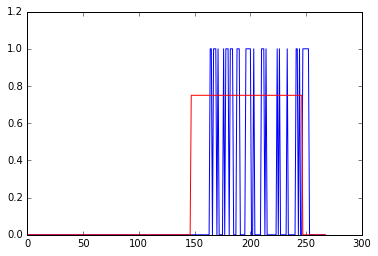

In [25]:
a = (np.array(pd.DataFrame(model_portugese.predict(X_np_new)>0.5)[0]))*1
b = model_portugese_1.predict(X_np)
c = model_portugese_2.predict(X_np)
d = model_portugese_3.predict(X_np)
s1 = (np.array(pd.DataFrame(model_spanish.predict(spanish_bahia_np)>0.5)[0]))*1
s2 = model_spanish_1.predict(spanish_bahia)
s3 = model_spanish_2.predict(spanish_bahia)
s4 = model_spanish_3.predict(spanish_bahia)
end = ((  ((s1+s2+s3+s4)==4)  + ((a+b+c+d)==4)   ))
plt.plot(end)
plt.plot(Y_bin_np*0.75, color = 'red')
plt.plot(1.05)

In [86]:
def prediction(portugese, spanish):
    spanish_per = np.array((spanish+0.1)/(0.1+100))
    sin_X_br = pd.DataFrame(np.sin(spanish_per))
    cos_X_br = pd.DataFrame(np.cos(spanish_per))
    square_X_br = pd.DataFrame((spanish_per)**2)
    root_X_br = pd.DataFrame((spanish_per)**(1/2))
    brazil_all_concat5 = pd.concat([pd.DataFrame(spanish_per),sin_X_br,cos_X_br,square_X_br,root_X_br],2)
    spanish_per_np = np.array(brazil_all_concat5)
    
    maranhao_X_np = np.array((portugese+0.1)/(0.1+100))
    sin_X_mh = pd.DataFrame(np.sin(maranhao_X_np))
    cos_X_mh = pd.DataFrame(np.cos(maranhao_X_np))
    square_X_mh = pd.DataFrame((maranhao_X_np)**2)
    root_X_mh = pd.DataFrame((maranhao_X_np)**(1/2))
    maranhao_all_concat = pd.concat([pd.DataFrame(maranhao_X_np),sin_X_mh,
                                   cos_X_mh,square_X_mh,root_X_mh],2)
    maranhao_np_new = np.array(maranhao_all_concat)
    
    a = (np.array(pd.DataFrame(model_portugese.predict(maranhao_np_new)>0.5)[0]))*1
    b = model_portugese_1.predict(maranhao_X_np)
    c = model_portugese_2.predict(maranhao_X_np)
    d = model_portugese_3.predict(maranhao_X_np)
    s1 = (np.array(pd.DataFrame(model_spanish.predict(spanish_per_np)>0.5)[0]))*1
    s2 = model_spanish_1.predict(spanish_per)
    s3 = model_spanish_2.predict(spanish_per)
    s4 = model_spanish_3.predict(spanish_per)
    end = (a+b+c+d) >= 3
    start = (s1+s2+s3+s4) >= 4
    plt.plot(end+start)
    plt.plot(Y_bin_np*0.75, color = 'red')
    plt.plot(1.05)

In [29]:
rdj_p = pd.read_csv("Portugese_RDJ.csv", header = None)
parana_p = pd.read_csv("Portugese_Parana.csv", header = None)
goias_p = pd.read_csv("Portugese_Goias.csv", header = None)
rdj_s = pd.read_csv("Spanish_RDJ.csv", header = None)
parana_s = pd.read_csv("Spanish_Parana.csv", header = None)
goias_s = pd.read_csv("Spanish_Goias.csv", header = None)
bahia_s = pd.read_csv("Spanish_Bahia.csv", header = None)
norte_s = pd.read_csv("Spanish_Norte.csv", header = None)
per_s = pd.read_csv("Spanish_Per.csv", header = None)
maran_s = pd.read_csv("Spanish_Maran.csv", header = None)
bahia_p = pd.read_csv("Brazil_Bahia.csv", header=None)
brazil_p = pd.read_csv("Brazil_all.csv",header=None)
brazil_s = pd.read_csv("Spanish_Brazil.csv",header=None)
maran_p = pd.read_csv("Brazil_Maranhao.csv",header=None)
norte_p = pd.read_csv("Brazil_Norte.csv",header=None)
per_p = pd.read_csv("Brazil_Per.csv",header=None)

ceara_p = pd.read_csv("Portugese_Ceara.csv", header= None)
ceara_s = pd.read_csv("Spanish_Ceara.csv", header = None)
esp_p = pd.read_csv("Portugese_Esp.csv", header = None)
esp_s = pd.read_csv("Spanish_Esp.csv", header = None)
santa_p = pd.read_csv("Portugese_Santa.csv" , header = None)
santa_s = pd.read_csv("Spanish_Santa.csv", header = None)

dates = bahia_p.pop(0)
dates = brazil_p.pop(0)

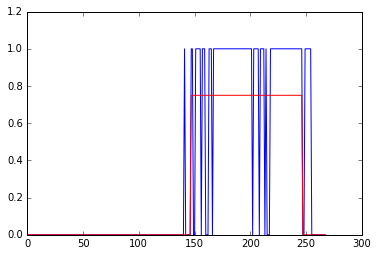

In [87]:
prediction(brazil_p,brazil_s)

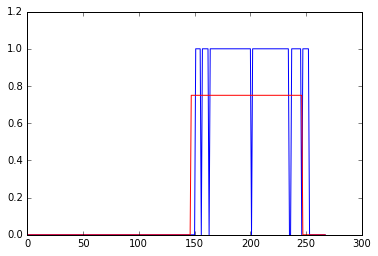

In [88]:
prediction(bahia_p, bahia_s)

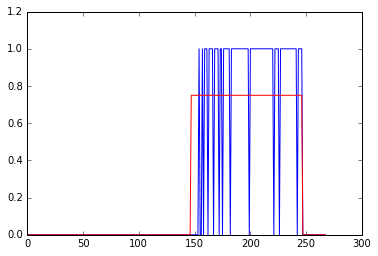

In [89]:
prediction(norte_p,norte_s)

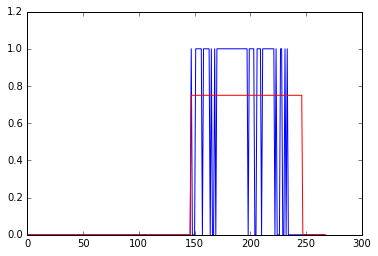

In [90]:
prediction(per_p,per_s)

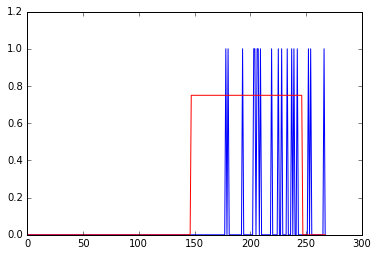

In [91]:
prediction(maran_p,maran_s)

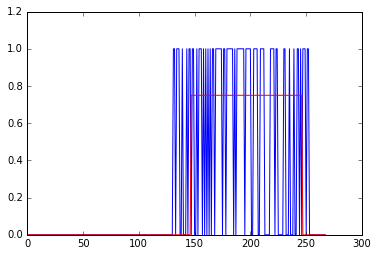

In [92]:
prediction(rdj_p,rdj_s)

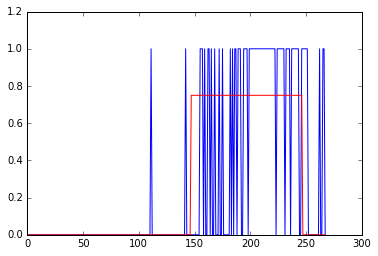

In [93]:
prediction(parana_p,parana_s)

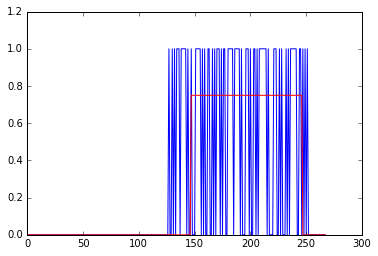

In [94]:
prediction(goias_p,goias_s)

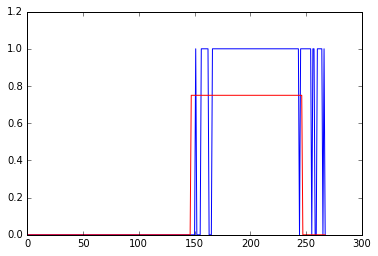

In [95]:
prediction(ceara_p,ceara_s)

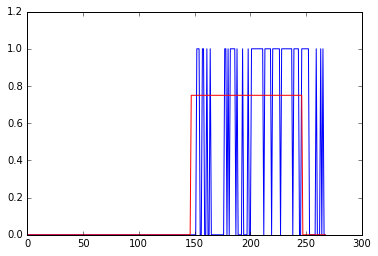

In [96]:
prediction(santa_p,santa_s)

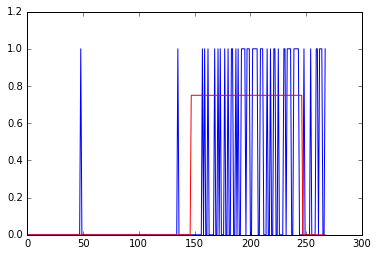

In [97]:
prediction(esp_p, esp_s)